In [3]:
from pydataset import data
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from env import user, host, password

In [2]:
# For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), 
# then give an example of what a true positive, true negative, type I and type II errors would look like. Note 
# that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more 
#precise questions that could be tested.

    # A. Has the network latency gone up since we switched internet service providers?
    # B. Is the website redesign any good?
    # C. Is our television ad driving more sales?



In [3]:
# A. Has the network latency gone up since we switched internet service providers?
# There is no difference in network latency since we switched internet service providers.
# Network latency has improved since we switched internet service providers.

In [4]:
# B. Is the website redesign any good?
# The website redesign is working to allow customers to use paypal for payments.
# The website redesign is not working to allow customers to use payal for payments.

In [5]:
# C. Is our television ad driving more sales?
# The tv ad to buy more widgets is driving more sales.
# The tv ad is not driving more sales to buy more widgets.

In [13]:
from math import sqrt


In [1]:
# 1. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 
# A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 
# sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of 
# significance.

# There is no difference in the average time to sell homes between the two offices.
# There IS a difference in the average time to sell homes between the tow offices.



# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind_from_stats.html

#What are we comparing?
#average time (numeric continuous values) to sell for two different groups (categories)
#Form a hypothesis:
#$H_0$ = There is no difference in average time to sell at two offices
#$H_a$ = There is difference in average time to sell at two offices
#Significance level $\alpha$ = 0.05


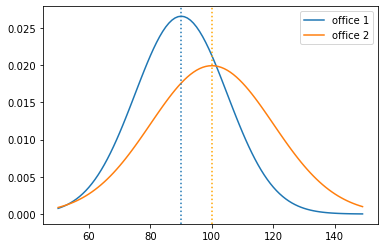

In [4]:
# Visualize two distribution:

x = np.arange(50,150)

y1 = stats.norm(90,15).pdf(x)
y2 = stats.norm(100,20).pdf(x)


plt.plot(x, y1, label = 'office 1')
plt.plot(x, y2, label = 'office 2')
plt.axvline(90, ls = ':')
plt.axvline(100, ls = ':', color = 'orange')


plt.legend()

In [10]:
#Using Scipy 
a = 0.05
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind_from_stats.html

t, p = stats.ttest_ind_from_stats(100,20,50, 90,15,40)
t,p

(2.6252287036468456, 0.01020985244923939)

In [11]:
print(f'''
Because the p-value ({p}) is less than alpha value ({α}),we reject the null hypothesis''')



Because the p-value (0.01020985244923939) is less than alpha value (0.05),we reject the null hypothesis


In [14]:
# Can be calculated in  python using the formula for two- 
# sample t-test

α = 0.05

# Sample means:
xbar1 = 90
xbar2 = 100

# Given sample size:
n1 = 40
n2 = 50

# given std deviations:
s1 = 15
s2 = 20


# Degrees of freedom
degf = n1 + n2 - 2

# Calculate pooled standard deviation:
s_p = sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2)/
           (n1 + n2 - 2))

# Calculate t-statistic value
t = (xbar2 - xbar1) / (s_p * sqrt(1 / n1 + 1 / n2))

print(f't = {t:.4}')

t = 2.625


In [15]:
#Calculate p value for calculated t-statistic
p = stats.t(degf).sf(t) * 2
print(f'p = {p:.3}')

p = 0.0102


In [18]:
# 2. Load the mpg dataset and use it to answer the following questions:

    # Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
    

mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


# 1. Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
Comparing fuel economy two different sub-groups (2-sample, 2-tailed t-test)
$H_0$: there is no difference in fuel-efficiency in cars from 2008 vs 1999
$H_a$: there is a difference in fuel-efficiency in cars from 2008 vs 1999
Calculate average fuel economy assuming 50% highway and 50% city driving
Should I use arithmetic mean or harmonic mean for average mpg?
Arithmetic Mean: fe_am = (cty + hwy)/2
Harmonic Mean: fe_hm = 2/(1/cty + 1/hwy)

In [19]:
mpg['avg_fe'] = stats.hmean(mpg[['cty', 'hwy']], axis =1)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_fe
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [20]:
fe_2008 = mpg[mpg.year == 2008].avg_fe
fe_1999 = mpg[mpg.year == 1999].avg_fe

In [21]:
t, p = stats.ttest_ind(fe_2008, fe_1999)
t, p

(-0.3011962975077886, 0.7635345888327115)

In [22]:
print(f'''
Because p ({p:.3f}) > alpha (.05), we fail to reject the null\
 hypothesis that there is no difference in fuel-efficency in cars\
 from 2008 and 1999.
''')


Because p (0.764) > alpha (.05), we fail to reject the null hypothesis that there is no difference in fuel-efficency in cars from 2008 and 1999.



In [23]:
fe_2008.mean(), fe_1999.mean()

(19.488662986569054, 19.68238764869729)

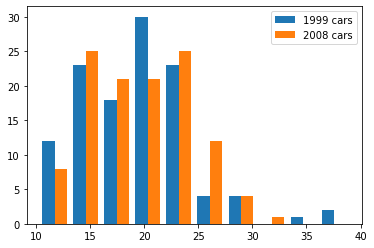

In [24]:
plt.hist([fe_1999, fe_2008], label=["1999 cars", "2008 cars"])
plt.legend(loc="upper right")

##  2. Are compact cars more fuel-efficient than the average car?
Comparing fuel economy two different sub-groups (1-sample, 1-tailed t-test)

$H_0$: There is no difference in fuel-efficiency between compact cars and the population average fuel-efficiency

$H_a$: Compact cars are more fuel efficient than the average car

for $H_a$ to be true, t > 0 and p/2 < 0.05

In [25]:
fe_compact = mpg[mpg['class'] == 'compact'].avg_fe
μ = mpg.avg_fe.mean()

t, p = stats.ttest_1samp(fe_compact, μ)
t, p

(7.512360093161354, 1.5617666348807727e-09)

In [26]:
print(f'''
Because p/2 ({p/2:.12f}) < alpha (.05), we reject the null hypothesis that there isno difference in fuel-efficiency between compact cars and the overall average.
''')


Because p/2 (0.000000000781) < alpha (.05), we reject the null hypothesis that there isno difference in fuel-efficiency between compact cars and the overall average.



# Do manual cars get better gas mileage than automatic cars?

$H_0$: there is no difference in fuel-efficiency between manual cars and automatic transmission cars

$H_a$: there is a difference in fuel-efficiency between manual cars and automatic transmission cars

In [27]:
fe_auto = mpg[mpg.trans.str.contains('auto')].avg_fe
fe_manual = mpg[mpg.trans.str.contains('manual')].avg_fe

t, p = stats.ttest_ind(fe_manual, fe_auto)
t, p

(4.652577547151351, 5.510464610044005e-06)

In [28]:
print(f'''
Because p/2 ({p/2:.6f}) < alpha (.05), we reject the null hypothesis that there is no difference in gas mileage between manual and automatic cars
''')


Because p/2 (0.000003) < alpha (.05), we reject the null hypothesis that there is no difference in gas mileage between manual and automatic cars



Text(0.5, 1.0, 'Is mileage different by transmission type?')

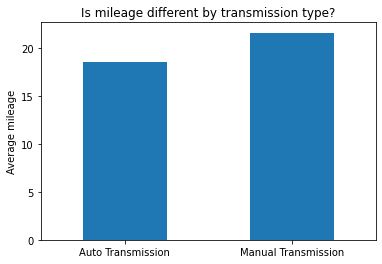

In [30]:
mpg['transmission_type'] = np.where(mpg.trans.str.contains('auto'), 'Auto Transmission', 'Manual Transmission')
mpg.groupby('transmission_type').avg_fe.mean().plot.bar()
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Average mileage')
plt.title('Is mileage different by transmission type?')

# Correlation

In [13]:
# 1. Use the telco_churn data. Does tenure correlate with monthly charges? 
# Total charges? What happens if you control for phone and internet service?

#Null H: There is no linear correlation between tenure and monthly charges.
#Alt H: There is a liner relationship between tenure and monthly charges.

In [38]:
df = pd.read_csv("clean_telco.csv")

In [39]:
df.head()

,id,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_int,payment_type,...,tenure_month,has_churned,has_phone,has_internet,has_internet_and_phone,partner_dependents,start_day,phone_type,internet_type,contract_type
0,0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,...,9.0,False,True,True,True,3,2020-05-03,One Line,DSL,1 Year
1,1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,...,9.1,False,True,True,True,0,2020-05-03,Two or More Lines,DSL,Month-to-Month
2,2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,...,3.8,True,True,True,True,0,2020-11-03,One Line,Fiber Optic,Month-to-Month
3,3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,...,12.6,True,True,True,True,1,2020-02-03,One Line,Fiber Optic,Month-to-Month
4,4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,...,3.2,True,True,True,True,1,2020-11-03,One Line,Fiber Optic,Month-to-Month


In [16]:
#sns.pairplot(df, corner=True)
#plt.suptitle("sns.pairpolot visualizes continuous variable relationships")
#plt.show()

In [40]:
df.corr()

,id,is_senior_citizen,phone_service,internet_service,contract_int,monthly_charges,total_charges,tenure_month,has_churned,has_phone,has_internet,has_internet_and_phone,partner_dependents
id,1.000000,-0.002357,-0.001885,-0.002983,0.016536,-0.004876,-0.000188,0.008700,-0.018405,-0.006987,0.004490,-0.000466,-0.018068
is_senior_citizen,-0.002357,1.000000,0.113874,0.259006,-0.141981,0.219868,0.102385,0.015147,0.150709,0.008392,0.182737,0.167613,-0.150716
phone_service,-0.001885,0.113874,1.000000,0.308312,0.084590,0.491369,0.412877,0.259601,0.035450,0.674792,0.083188,0.503897,0.033350
internet_service,-0.002983,0.259006,0.308312,1.000000,-0.289365,0.905440,0.428525,0.030413,0.316479,0.094084,0.825888,0.793326,-0.132576
contract_int,0.016536,-0.141981,0.084590,-0.289365,1.000000,-0.073313,0.449706,0.676588,-0.396187,0.004286,-0.242800,-0.212869,0.299319
monthly_charges,-0.004876,0.219868,0.491369,0.905440,-0.073313,1.000000,0.651265,0.246022,0.192825,0.248275,0.763333,0.836041,-0.044482
total_charges,-0.000188,0.102385,0.412877,0.428525,0.449706,0.651265,1.000000,0.825733,-0.199488,0.113800,0.374967,0.405483,0.177757
tenure_month,0.008700,0.015147,0.259601,0.030413,0.676588,0.246022,0.825733,1.000000,-0.354054,0.009294,0.036038,0.037924,0.276539
has_churned,-0.018405,0.150709,0.035450,0.316479,-0.396187,0.192825,-0.199488,-0.354054,1.000000,0.010499,0.228536,0.209625,-0.182739
has_phone,-0.006987,0.008392,0.674792,0.094084,0.004286,0.248275,0.113800,0.009294,0.010499,1.000000,-0.171961,0.484578,0.006999


In [35]:
x = df.tenure_month
y = df.monthly_charges
alpha = 0.05

In [41]:
corr, p = stats.pearsonr(x, y)
corr, p

(0.24602222678861455, 1.8834273042677756e-97)

In [37]:
null_h = "There is no linear correlation between tenure and monthly charges"
alt_h = "There is a liner correlation between tenure and monthly charges"
corr, p = stats.pearsonr(x, y)

if p < alpha:
    print("We reject the null hypothesis")
    print("We falisifed", null_h)
    print("Evidence supports the", alt_h)
else:
    print("We fail to reject the null hypothesis")
    print("There is no evidence to support the ", alt_h)

We reject the null hypothesis
We falisifed There is no linear correlation between tenure and monthly charges
Evidence supports the There is a liner correlation between tenure and monthly charges


In [42]:
 #Total charges? 

#Null1 H: There is no linear correlation between tenure and total charges.
#Alt1 H: There is a liner relationship between tenure and total charges.

y = df.total_charges    
    
corr, p = stats.pearsonr(x, y)

In [43]:
corr, p

(0.8257328669183033, 0.0)

In [44]:
null1_h = "There is no linear correlation between tenure and total charges"
alt1_h = "There is a liner correlation between tenure and total charges"
corr, p = stats.pearsonr(x, y)

if p < alpha:
    print("We reject the null hypothesis")
    print("We falisifed", null1_h)
    print("Evidence supports the", alt1_h)
else:
    print("We fail to reject the null hypothesis")
    print("There is no evidence to support the ", alt1_h)

We reject the null hypothesis
We falisifed There is no linear correlation between tenure and total charges
Evidence supports the There is a liner correlation between tenure and total charges


In [55]:
def correlation_test(x, y):
    message = ""
    corr, p = stats.pearsonr(x, y)
    
    if p < alpha:
        message = "reject the null hypothesis that there is no linear correlation. Evidence supports a linear correlation." 
    else:
        message = "fail to reject the null hypothesis that there is no linear correlation. Insufficient evidence to support a linear correlation between the two values."
    
    return corr, p, message

# How to Control for Variables

Perform your original analysis in a way that removes the variable we're trying to control out of the question.

If we control for phone service, and test for linear correlation between tenure and monthly_charges, then we will create a no_phone and a phone group then check their tenure to monthly_charges correlation w/ the Pearson's test

If we also control for internet connection, we'll need to produce each pairing of subset# 

#Null2 H: There is no linear correlation between phone and internet service.
#Alt2 H: There is a liner relationship between phone and internet service.


In [48]:
# We'll run a correlation test for 
df.phone_type.value_counts()

One Line             3386
Two or More Lines    2966
No Phone Service      680
Name: phone_type, dtype: int64

In [49]:
df.internet_type.value_counts()

Fiber Optic            3097
DSL                    2413
No Internet Service    1522
Name: internet_type, dtype: int64

In [50]:
# Let's combine all these different values together
df["telecom_setup"] = df.internet_type + " " + df.phone_type
df.head().T

,0,1,2,3,4
id,0,1,2,3,4
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ
gender,Female,Male,Male,Male,Female
is_senior_citizen,0,0,0,1,1
partner,Yes,No,No,Yes,Yes
dependents,Yes,No,No,No,No
phone_service,1,2,1,1,1
internet_service,1,1,2,2,2
contract_int,1,0,0,0,0
payment_type,Mailed check,Mailed check,Electronic check,Electronic check,Mailed check


In [51]:
df.telecom_setup.value_counts()

Fiber Optic Two or More Lines            1937
No Internet Service One Line             1182
Fiber Optic One Line                     1160
DSL One Line                             1044
DSL Two or More Lines                     689
DSL No Phone Service                      680
No Internet Service Two or More Lines     340
Name: telecom_setup, dtype: int64

In [52]:
options = df.telecom_setup.value_counts().index
options

Index(['Fiber Optic Two or More Lines', 'No Internet Service One Line',
       'Fiber Optic One Line', 'DSL One Line', 'DSL Two or More Lines',
       'DSL No Phone Service', 'No Internet Service Two or More Lines'],
      dtype='object')

In [53]:
options[1]

'No Internet Service One Line'

In [56]:
# Run through the set of all options for tenure vs. monthly_charges

output = []

for option in options:
    subset = df[df.telecom_setup == option]
    corr, p, message = correlation_test(subset.tenure_month, subset.monthly_charges)
    result = {
        "option": option,
        "corr": corr,
        "p": p,
        "message": message
    }
    output.append(result)

print("Correlation test for tenure vs. monthly_charges, controling for Internet/Phone service")
pd.DataFrame(output)

Correlation test for tenure vs. monthly_charges, controling for Internet/Phone service


,option,corr,p,message
0,Fiber Optic Two or More Lines,0.573677,6.125936e-170,reject the null hypothesis that there is no linear correlation. Evidence supports a li...
1,No Internet Service One Line,-0.012010,6.799938e-01,fail to reject the null hypothesis that there is no linear correlation. Insufficient e...
2,Fiber Optic One Line,0.529938,5.607453e-85,reject the null hypothesis that there is no linear correlation. Evidence supports a li...
3,DSL One Line,0.561734,7.199649e-88,reject the null hypothesis that there is no linear correlation. Evidence supports a li...
4,DSL Two or More Lines,0.610191,1.647669e-71,reject the null hypothesis that there is no linear correlation. Evidence supports a li...
5,DSL No Phone Service,0.591798,1.736039e-65,reject the null hypothesis that there is no linear correlation. Evidence supports a li...
6,No Internet Service Two or More Lines,-0.031353,5.645227e-01,fail to reject the null hypothesis that there is no linear correlation. Insufficient e...


<AxesSubplot:xlabel='tenure_month', ylabel='monthly_charges'>

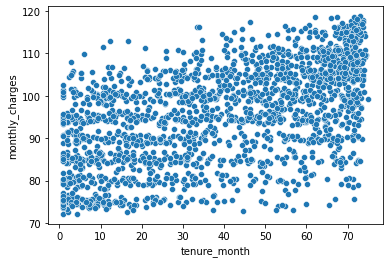

In [58]:
fiber_2_lines = df[df.telecom_setup == "Fiber Optic Two or More Lines"]
sns.scatterplot(x="tenure_month", y="monthly_charges", data=fiber_2_lines)

<AxesSubplot:xlabel='tenure_month', ylabel='monthly_charges'>

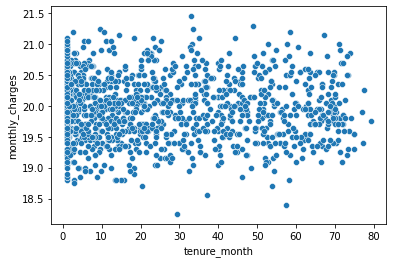

In [59]:
no_internet_one_line = df[df.telecom_setup == "No Internet Service One Line"]
sns.scatterplot(x="tenure_month", y="monthly_charges", data=no_internet_one_line)

<AxesSubplot:xlabel='tenure_month', ylabel='monthly_charges'>

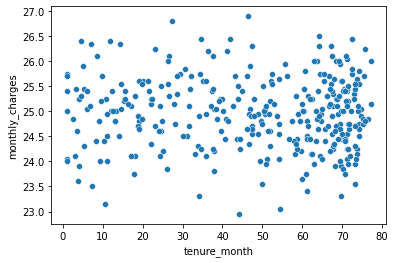

In [60]:
no_internet_multiple_lines = df[df.telecom_setup == "No Internet Service Two or More Lines"]
sns.scatterplot(x="tenure_month", y="monthly_charges", data=no_internet_multiple_lines)

In [61]:
# Run through the set of all options for tenure vs. total_charges

output = []

for option in options:
    subset = df[df.telecom_setup == option]
    corr, p, message = correlation_test(subset.tenure_month, subset.total_charges)
    result = {
        "option": option,
        "corr": corr,
        "p": p,
        "message": message
    }
    output.append(result)

print("Correlation test for tenure vs. total_charges, controling for Internet/Phone service") 
pd.DataFrame(output)

Correlation test for tenure vs. total_charges, controling for Internet/Phone service


,option,corr,p,message
0,Fiber Optic Two or More Lines,0.983949,0.0,reject the null hypothesis that there is no linear correlation. Evidence supports a li...
1,No Internet Service One Line,0.999276,0.0,reject the null hypothesis that there is no linear correlation. Evidence supports a li...
2,Fiber Optic One Line,0.987473,0.0,reject the null hypothesis that there is no linear correlation. Evidence supports a li...
3,DSL One Line,0.974246,0.0,reject the null hypothesis that there is no linear correlation. Evidence supports a li...
4,DSL Two or More Lines,0.967037,0.0,reject the null hypothesis that there is no linear correlation. Evidence supports a li...
5,DSL No Phone Service,0.954261,0.0,reject the null hypothesis that there is no linear correlation. Evidence supports a li...
6,No Internet Service Two or More Lines,0.998031,0.0,reject the null hypothesis that there is no linear correlation. Evidence supports a li...


In [144]:
# 2. Use the employees database.

    #Is there a relationship between how long an employee has been with the company and their salary?
    #Is there a relationship between how long an employee has been with the company and the number of titles 
    #they have had?
def get_data_from_sql(user, host, password, database, query):
    '''
    take in user, host, password, 
    database and query
    Access sql database
    return a pandas dataframe of the query results   
    '''
    
    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
        
    return pd.read_sql(query, url)

In [115]:
database = 'employees'

sql = """
select datediff(curdate(), hire_date) as days_on_job, salary
from employees
join salaries using(emp_no)
where to_date > curdate();
"""

df = get_data_from_sql(user, host, password, database, query)

In [105]:
df.head(3)

,days_on_job,salary
0,12832,88958
1,13049,72527
2,12769,43311


<AxesSubplot:xlabel='days_on_job', ylabel='salary'>

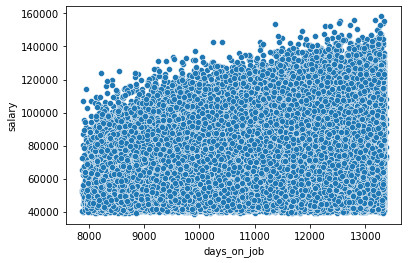

In [106]:
sns.scatterplot(x="days_on_job", y="salary", data=df)

# Is there a relationship between how long an employee has been with the company and their salary?

$H_o$: There is not a linear correlation between employee tenure and salary

$H_a$: There is a linear correlation between employee tenure and salary


In [107]:
alpha = 0.05
corr, p = stats.pearsonr(df.days_on_job, df.salary)

if p < alpha:
    print("We reject the null hypothesis")
    print("Evidence supports the claim that there is a linear correlation")
else:
    print("We fail to reject the null hypothesis")

corr, p

We reject the null hypothesis
Evidence supports the claim that there is a linear correlation


(0.30646256131860894, 0.0)

# Is there a relationship between how long an employee has been with the company and the number of titles they have had?

$H_o$: There is no linear correlation between tenure and number of titles

$H_a$: There is a linear correlation between tenure and number of titles

In [116]:
database = 'employees'
sql = """
select emp_no, count(title) as title_count, datediff(curdate(), hire_date) as days_on_job
from employees
join titles using(emp_no)
group by emp_no;
"""
df = get_data_from_sql(user, host, password, database, query)

In [120]:

df.head()

,days_on_job,salary
0,12832,88958
1,13049,72527
2,12769,43311
3,12674,74057
4,11658,94692


In [121]:
corr, p = stats.pearsonr(df.days_on_job, df.title_count)

if p < alpha:
    print("We reject the null hypothesis")
    print("Evidence supports the claim that there is a linear correlation between tenure and number of titles")
else:
    print("We fail to reject the null hypothesis")

corr, p

AttributeError: 'DataFrame' object has no attribute 'title_count'

# Takeaway: It's possible to have a super low p value, even zero p value, and still have a weak correlation. A super high number of observations can show significance through low p values

In [ ]:
#Null H: There is no linear correlation between days and reaction time.
#Alt H: There is a liner relationship between days and reaction time.

In [123]:
# 3. Use the sleepstudy data. Is there a relationship between days and reaction time?

df = data("sleepstudy")
df.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [124]:
x = df.Days
y = df.Reaction
alpha = 0.05

In [125]:
corr, p = stats.pearsonr(x, y)
corr, p

(0.5352302262650253, 9.894096322214812e-15)

In [126]:
null_h = "There is no linear correlation between days and reaction time."
alt_h = "There is a liner correlation between days and reaction time."
corr, p = stats.pearsonr(x, y)

if p < alpha:
    print("We reject the null hypothesis")
    print("We falisifed", null_h)
    print("Evidence supports the", alt_h)
else:
    print("We fail to reject the null hypothesis")
    print("There is no evidence to support the ", alt_h)

We reject the null hypothesis
We falisifed There is no linear correlation between days and reaction time.
Evidence supports the There is a liner correlation between days and reaction time.


# Chi Square

In [ ]:
# 1. Use the following contingency table to help answer the question of whether using a macbook and being a 
# codeup student are independent of each other.

                     # Codeup Student	Not Codeup Student
# Uses a Macbook	         49	                 20
# Doesn't Use A Macbook	      1	                 30

In [ ]:
# contingency = pd.DataFrame({'codeup_student': [49,1], 'not_codeup_student': [20,30]}, index=['uses_macbook', 'not_macbook'])
# contingency

In [128]:
print(49+20)
print(1+30)

69
31


In [129]:
print(49+1)
print(20+30)

50
50


In [130]:
print(69+31)
print(50/100)
print(50/100)
print(69/100)
print(31/100)

100
0.5
0.5
0.69
0.31


In [131]:
print(0.5*0.69)
print(0.5*0.69)
print(0.5*0.31)
print(0.5*0.31)

0.345
0.345
0.155
0.155


In [132]:
index = ['Uses a Macbook', "Doesn't Use A Macbook"]
columns = ['Codeup Student', 'Not Codeup Student']

observed = pd.DataFrame([[49, 20], [1, 30]], index = index, columns = columns)
n = observed.values.sum()

expected = pd.DataFrame([[.345, .345], [.155, .155]], index = index, columns = columns)
chi2 = ((observed - expected)**2 / expected).values.sum()

nrows, ncols = observed.shape

degrees_of_freedom = (nrows - 1) * (ncols - 1)

p = stats.chi2(degrees_of_freedom).sf(chi2)

print('Observed')
print(observed)
print('---\nExpected')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')


Observed
                       Codeup Student  Not Codeup Student
Uses a Macbook                     49                  20
Doesn't Use A Macbook               1                  30
---
Expected
                       Codeup Student  Not Codeup Student
Uses a Macbook                  0.345               0.345
Doesn't Use A Macbook           0.155               0.155
---

chi^2 = 13732.7438
p     = 0.0000


In [133]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[49 20]
 [ 1 30]]
---
Expected

[[34.5 34.5]
 [15.5 15.5]]
---

chi^2 = 36.6526
p     = 0.0000


### Our p value is less than our alpha and we can reject the null hypothesis, indicating that macbook use is not necessarily independent of codeup matriculation

In [134]:
# 2. Choose another 2 categorical variables from the mpg dataset and perform a chi2 contingency table test with 
# them. Be sure to state your null and alternative hypotheses.

mpg = data('mpg')
mpg['transmission'] = mpg.trans.str[:-4] # a little cleaning goes a long way
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,transmission
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,auto
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,manual
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,manual
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,auto
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,auto


In [135]:
n = mpg.shape[0]

transmission_proportions = mpg.transmission.value_counts() / n
transmission_proportions

auto      0.67094
manual    0.32906
Name: transmission, dtype: float64

In [136]:
drive_proportions = mpg.drv.value_counts() / n
drive_proportions

f    0.452991
4    0.440171
r    0.106838
Name: drv, dtype: float64

In [137]:
expected = pd.DataFrame()

for transmission_group, t_prop in transmission_proportions.iteritems():
    for drive_group, d_prop in drive_proportions.iteritems():
        expected.loc[drive_group, transmission_group] = t_prop * d_prop

expected.sort_index(inplace=True)
expected

,auto,manual
4,0.295328,0.144843
f,0.303930,0.149061
r,0.071682,0.035156


In [138]:
expected *= n
expected

,auto,manual
4,69.106838,33.893162
f,71.119658,34.880342
r,16.773504,8.226496


In [139]:
observed = pd.crosstab(mpg.drv, mpg.transmission)
observed

transmission,auto,manual
drv,,
4,75,28
f,65,41
r,17,8


In [140]:
chi2 = ((observed - expected)**2 / expected).values.sum()
chi2

3.136769245971112

In [141]:
nrows, ncols = observed.shape

degrees_of_freedom = (nrows - 1) * (ncols - 1)

In [142]:
stats.chi2(degrees_of_freedom).sf(chi2)

0.20838152534979645

### Our p value is less than our alpha and we can reject the null hypothesis
         We can suggest that vehicle class type if not independent of manufacturer

# 3. Use the data from the employees database to answer these questions:

3a. Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

In [146]:

url = f'mysql+pymysql://{user}:{password}@{host}/employees'
query = '''
select gender, departments.`dept_name`
from `employees`
join dept_emp using(emp_no)
join departments using(`dept_no`)
WHERE (dept_name = 'Sales' or dept_name = 'Marketing') AND  dept_emp.to_date > now()
'''
dept_gender = pd.read_sql(query, url)

In [147]:
observed = pd.crosstab(dept_gender.gender, dept_gender.dept_name)
observed

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


### $H_0$: Gender is independent of status in sales vs marketing departments
$H_a$: Gender is not independent of status in sales vs marketing departments

In [148]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [149]:
print('Observed:\n')
print(observed)
print('~~~~~~~~~~~~~~~~~~~~~~')
print('Expected: \n')
print(pd.DataFrame(expected, index=observed.index, columns=observed.columns))
print('~~~~~~~~~~~~~~~~~~~~~~')
print(f'chi^2 value: {chi2:.4f}')
print(f'p value: {p:.5f}')
print(f'degrees of freedom: {degf}')
if p < alpha:
    print('''Our p value is less than our alpha and we can reject the null hypothesis
         We can suggest working in Sales compared to Marketing is not independent of employee gender''')
else:
    print('We cannot reject the null hypothesis')


Observed:

dept_name  Marketing  Sales
gender                     
F               5864  14999
M               8978  22702
~~~~~~~~~~~~~~~~~~~~~~
Expected: 

dept_name    Marketing         Sales
gender                              
F          5893.242601  14969.757399
M          8948.757399  22731.242601
~~~~~~~~~~~~~~~~~~~~~~
chi^2 value: 0.3240
p value: 0.56919
degrees of freedom: 1
We cannot reject the null hypothesis


### 3b. Is an employee's gender independent of whether or not they are or have been a manager?

In [151]:
url = f'mysql+pymysql://{user}:{password}@{host}/employees'
query = '''
select gender, dept_manager.dept_no
from employees
LEFT JOIN dept_manager on dept_manager.emp_no = employees.emp_no
'''
gender_mgr = pd.read_sql(query, url)

In [152]:
gender_mgr

,gender,dept_no
0,M,None
1,F,None
2,M,None
3,M,None
4,M,None
...,...,...
300019,F,None
300020,M,None
300021,M,None
300022,M,None


In [153]:
# use fillna to replace 'None' with zero's

gender_mgr.fillna(0, inplace=True)

In [154]:
gender_mgr.head()

,gender,dept_no
0,M,0
1,F,0
2,M,0
3,M,0
4,M,0


In [155]:
# only look at columns where we have non-zero values for dept_no

gender_mgr[gender_mgr.dept_no != 0]


,gender,dept_no
100000,M,d001
100001,M,d001
100002,M,d002
100003,F,d002
100004,F,d003
100005,F,d003
100006,F,d004
100007,F,d004
100008,M,d004
100009,M,d004


In [156]:
gender_mgr.dept_no.value_counts()

0       300000
d004         4
d009         4
d006         4
d001         2
d003         2
d005         2
d002         2
d008         2
d007         2
Name: dept_no, dtype: int64

In [157]:
# Create a new column 'manager status'. 0 == not a manager, 1 = manager

gender_mgr['manager_status'] = gender_mgr.dept_no.apply(lambda x: x if x==0 else 1)

In [158]:
# look at value counts

gender_mgr.manager_status.value_counts()

0    300000
1        24
Name: manager_status, dtype: int64

In [160]:
# crosstab to create observed frequency

observed = pd.crosstab(gender_mgr.gender, gender_mgr.manager_status)
observed

manager_status,0,1
gender,,
F,120038,13
M,179962,11


In [161]:
#use scipy's stats library to calculate chi2, p and expected

chi2, p, _, expected = stats.chi2_contingency(observed)


In [162]:
print('Observed:\n')
print(observed)
print('~~~~~~~~~~~~~~~~~~~~~~')
print('Expected: \n')
print(pd.DataFrame(expected, index=observed.index, columns=observed.columns))
print('~~~~~~~~~~~~~~~~~~~~~~')
print(f'chi^2 value: {chi2:.4f}')
print(f'p value: {p:.8f}')
if p < alpha:
    print('''Our p value is less than our alpha and we can reject the null hypothesis
         We can suggest gender of employee is not independent of history as a manager''')
else:
    print('We cannot reject the null hypothesis')

Observed:

manager_status       0   1
gender                    
F               120038  13
M               179962  11
~~~~~~~~~~~~~~~~~~~~~~
Expected: 

manager_status              0          1
gender                                  
F               120041.396688   9.603312
M               179958.603312  14.396688
~~~~~~~~~~~~~~~~~~~~~~
chi^2 value: 1.4567
p value: 0.22745819
We cannot reject the null hypothesis
